## Random Forest

/var/folders/xw/sscnc6jx4kb4klgrdr8sgyz80000gn/T/ipykernel_1592/3723034886.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eric1026/qiskit/miniconda3/envs/qiskit/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


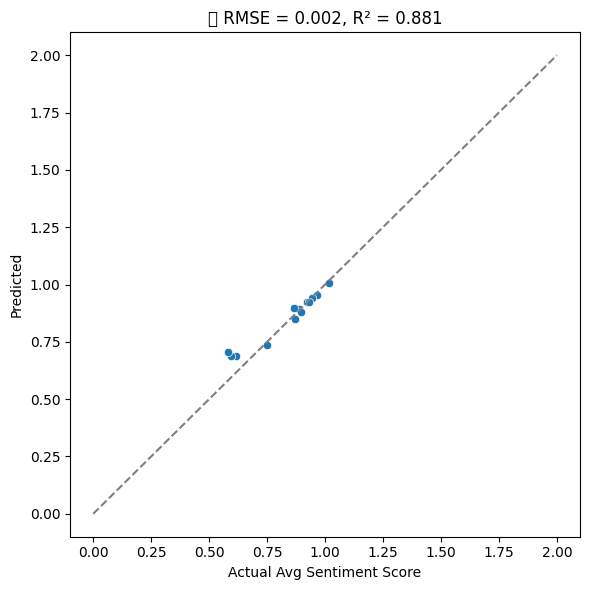

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]

# === 4. 切分訓練/測試資料集 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 5. 建立並訓練隨機森林回歸模型 ===
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === 6. 預測與評估 ===
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"📈 RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()


In [2]:
model.score(X_test,y_test)

0.8808583316656065

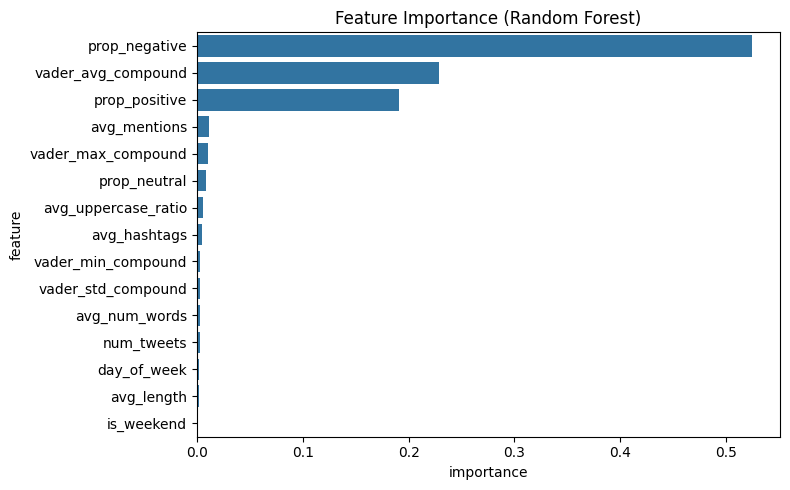

In [3]:
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x="importance", y="feature")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


/var/folders/xw/sscnc6jx4kb4klgrdr8sgyz80000gn/T/ipykernel_1592/3526538260.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eric1026/qiskit/miniconda3/envs/qiskit/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


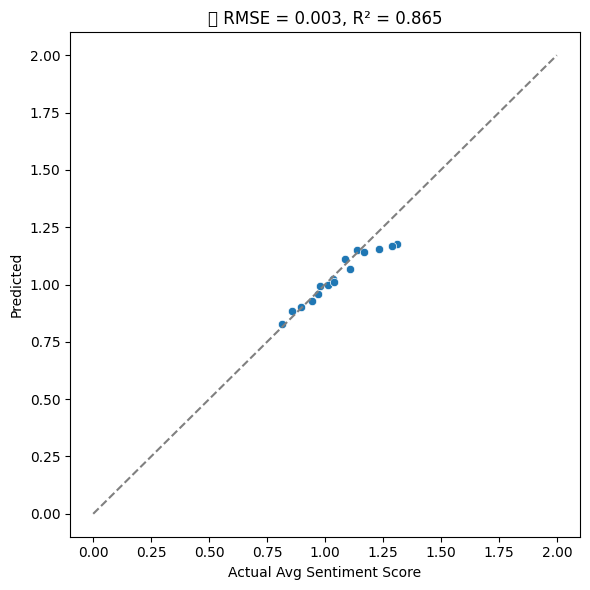

In [4]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features_test.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]
y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"📈 RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()

In [5]:
model.score(X,y)

0.8645086105918922

### Hyperparameter tuning

In [92]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入資料 ===
df = pd.read_csv("daily_sentiment_features.csv")
df = df.dropna()

X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]


# === 3. 定義超參數搜尋範圍 ===
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# === 4. 建立 GridSearchCV ===
grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# === 5. 訓練模型 ===
#grid.fit(X_train, y_train)
grid.fit(X,y)
# === 6. 最佳模型與參數 ===
best_model = grid.best_estimator_
print(f"✅ Best Parameters: {grid.best_params_}")




Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [93]:
best_model.score(X,y)

0.9770861437613497

In [96]:
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred)
rmse

0.0003410251791116008

/var/folders/xw/sscnc6jx4kb4klgrdr8sgyz80000gn/T/ipykernel_1592/2101939677.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eric1026/qiskit/miniconda3/envs/qiskit/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


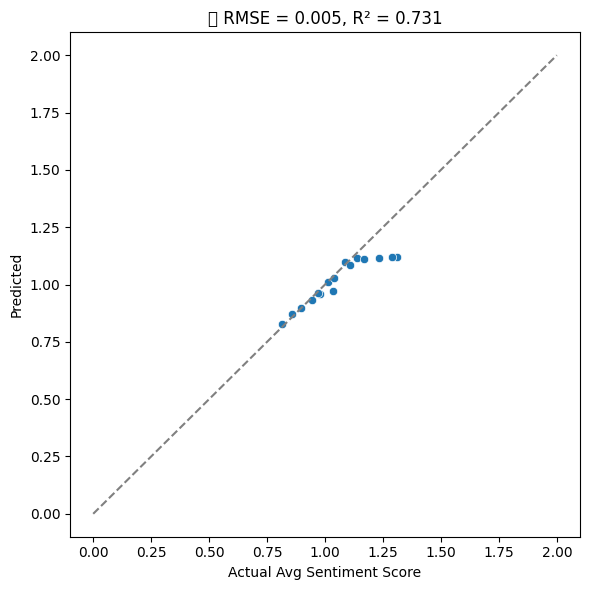

In [97]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features_test.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"📈 RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()

In [55]:
best_model.score(X,y)

0.7309443743381299

## Linear Regression

In [99]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso,LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入資料 ===
df = pd.read_csv("daily_sentiment_features.csv")
df = df.dropna()

X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]
"""
# === 2. 切分訓練/測試集 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
"""
li_model = LinearRegression()
li_model.fit(X,y)
# === 3. GridSearchCV for Ridge Regression ===
ridge_grid = GridSearchCV(
    Ridge(),
    param_grid={'alpha': [0.01, 0.1, 1.0, 10, 100]},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
ridge_grid.fit(X, y)
#ridge_grid.fit(X_train, y_train)
ridge_model = ridge_grid.best_estimator_

# === 4. GridSearchCV for Lasso Regression ===
lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid={'alpha': [0.01, 0.1, 1.0, 10, 100]},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
#lasso_grid.fit(X_train, y_train)
lasso_grid.fit(X, y)
lasso_model = lasso_grid.best_estimator_

# === 5. 評估最佳模型 ===
for name, model in [("Pure",li_model)]:
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"🔎 {name} Regression")
    print(f"   ▸ RMSE: {rmse:.4f}")
    print(f"   ▸ R²: {r2:.4f}")
for name, model in [("Ridge", ridge_model), ("Lasso", lasso_model)]:
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"🔎 {name} Regression")
    print(f"   ▸ Best alpha: {model.alpha}")
    print(f"   ▸ RMSE: {rmse:.4f}")
    print(f"   ▸ R²: {r2:.4f}")


🔎 Pure Regression
   ▸ RMSE: 0.0000
   ▸ R²: 1.0000
🔎 Ridge Regression
   ▸ Best alpha: 0.01
   ▸ RMSE: 0.0000
   ▸ R²: 0.9978
🔎 Lasso Regression
   ▸ Best alpha: 1.0
   ▸ RMSE: 0.0149
   ▸ R²: 0.0000


In [100]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入資料 ===
df = pd.read_csv("daily_sentiment_features.csv")
df = df.dropna()

X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]
"""
# === 2. 切分訓練/測試集 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
"""
li_model = LinearRegression()
li_model.fit(X,y)
# === 3. GridSearchCV for Ridge Regression ===
ridge_grid = GridSearchCV(
    Ridge(),
    param_grid={'alpha': [0.01, 0.1, 1.0, 10, 100]},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
ridge_grid.fit(X, y)
#ridge_grid.fit(X_train, y_train)
ridge_model = ridge_grid.best_estimator_

# === 4. GridSearchCV for Lasso Regression ===
lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid={'alpha': [0.01, 0.1, 1.0, 10, 100]},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
#lasso_grid.fit(X_train, y_train)
lasso_grid.fit(X, y)
lasso_model = lasso_grid.best_estimator_

# === 5. 評估最佳模型 ===
for name, model in [("Pure",li_model)]:
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"🔎 {name} Regression")
    print(f"   ▸ RMSE: {rmse:.4f}")
    print(f"   ▸ R²: {r2:.4f}")
for name, model in [("Ridge", ridge_model), ("Lasso", lasso_model)]:
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"🔎 {name} Regression")
    print(f"   ▸ Best alpha: {model.alpha}")
    print(f"   ▸ RMSE: {rmse:.4f}")
    print(f"   ▸ R²: {r2:.4f}")


🔎 Pure Regression
   ▸ RMSE: 0.0000
   ▸ R²: 1.0000
🔎 Ridge Regression
   ▸ Best alpha: 0.01
   ▸ RMSE: 0.0000
   ▸ R²: 0.9978
🔎 Lasso Regression
   ▸ Best alpha: 1.0
   ▸ RMSE: 0.0149
   ▸ R²: 0.0000


/var/folders/xw/sscnc6jx4kb4klgrdr8sgyz80000gn/T/ipykernel_1592/190672221.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eric1026/qiskit/miniconda3/envs/qiskit/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


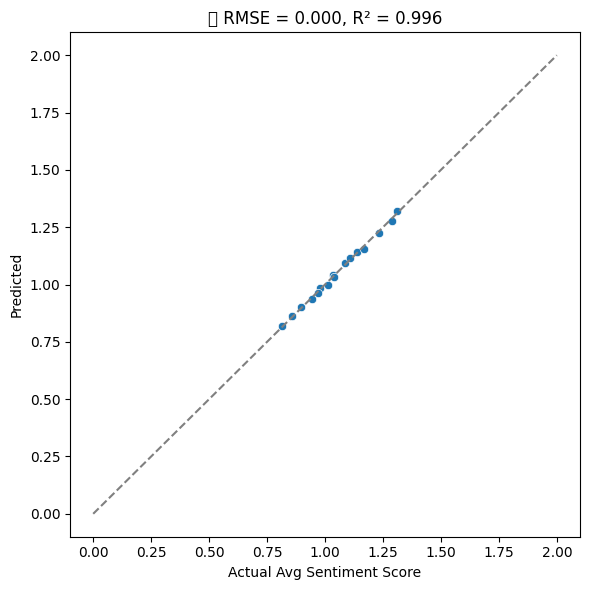

In [60]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features_test.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]
y_pred = ridge_model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"📈 RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()

In [61]:
ridge_model.score(X,y)

0.9964794239100807

### Feature reduction

🔍 Top Important Features (Linear Model):
                Feature  Coefficient  Abs_Coefficient
6         prop_negative    -0.842631         0.842631
8         prop_positive     0.824535         0.824535
9    vader_avg_compound     0.273562         0.273562
10   vader_std_compound     0.040906         0.040906
12   vader_min_compound    -0.032691         0.032691
4          avg_mentions     0.029495         0.029495
5   avg_uppercase_ratio    -0.019643         0.019643
7          prop_neutral     0.018096         0.018096
11   vader_max_compound    -0.015048         0.015048
3          avg_hashtags    -0.004833         0.004833


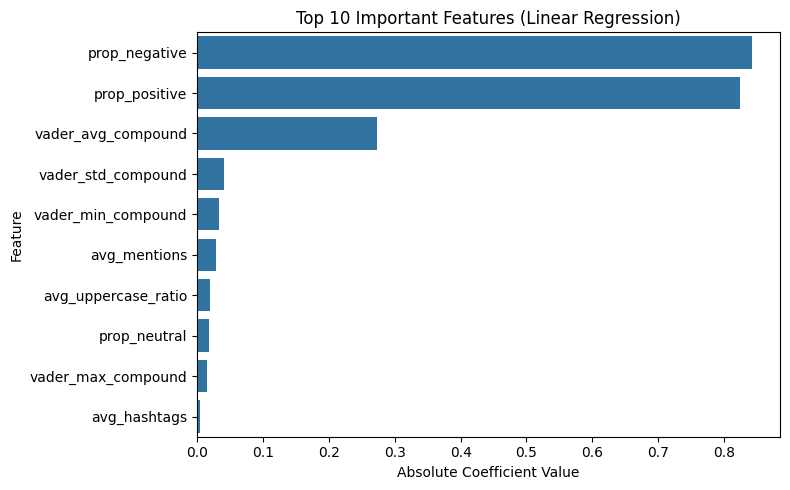

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
model = ridge_model

# 取得係數與特徵名稱
coefficients = model.coef_
feature_names = X.columns

# 整理成 DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

# 印出前幾名
print("🔍 Top Important Features (Linear Model):")
print(coef_df.head(10))

# 畫出 bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_df.head(10), x="Abs_Coefficient", y="Feature")
plt.title("Top 10 Important Features (Linear Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

✅ Best alpha: 0.01
RMSE: 0.0000
R²: 0.9979


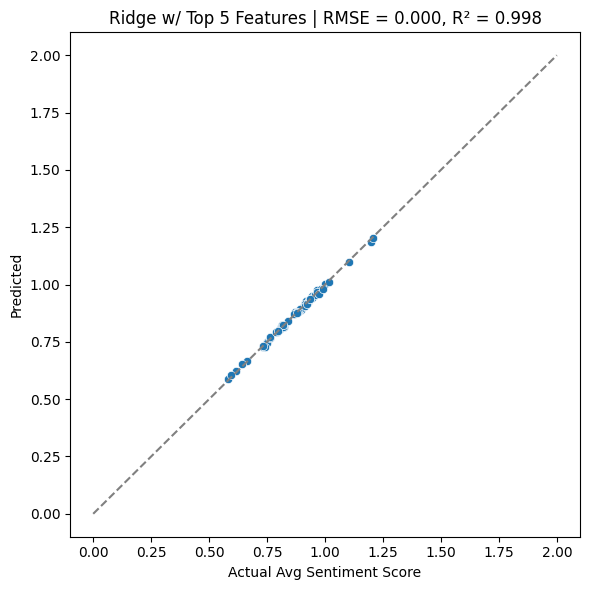

In [63]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入資料並選取前 5 特徵 ===
df = pd.read_csv("daily_sentiment_features.csv")
df = df.dropna()

top5_features = ['prop_negative', 'vader_avg_compound', 'prop_positive', 'vader_std_compound', 'avg_mentions']
X = df[top5_features]
y = df["avg_sentiment_score"]

# === 3. GridSearchCV for Ridge Regression ===
param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X, y)

best_model = grid.best_estimator_
print(f"✅ Best alpha: {best_model.alpha}")

# === 4. 預測與評估 ===
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# === 5. 視覺化 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([0, 2], [0, 2], linestyle='--', color='gray')
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"Ridge w/ Top 5 Features | RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.tight_layout()
plt.show()


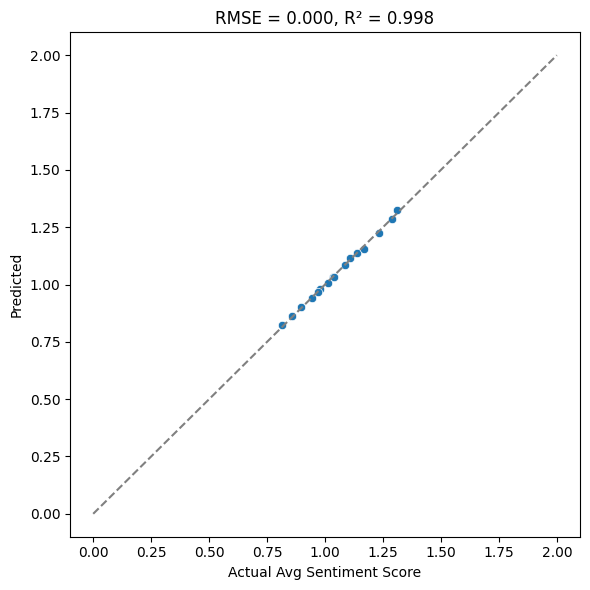

In [37]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features_test.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df[top5_features]
y = df["avg_sentiment_score"]
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()

## Check linear hypothesis

✅ Best alpha: 0.01
RMSE: 0.0000
R²: 0.9979


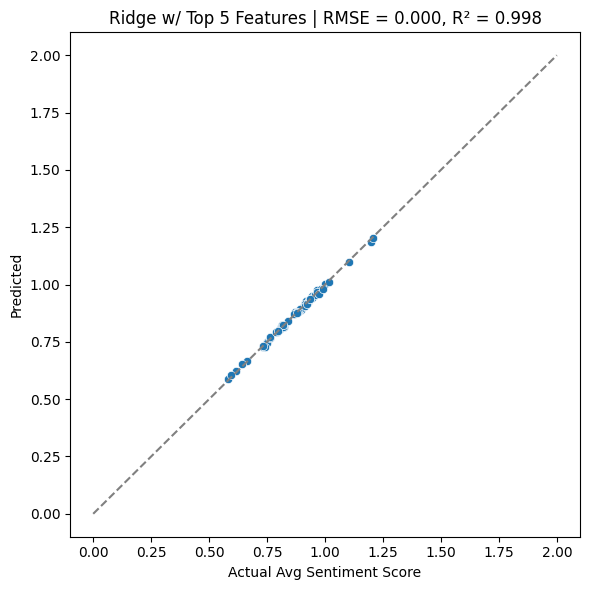

In [84]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入資料並選取前 5 特徵 ===
df = pd.read_csv("daily_sentiment_features.csv")
df = df.dropna()

top5_features = ['prop_negative', 'vader_avg_compound', 'prop_positive', 'vader_std_compound', 'avg_mentions']
X = df[top5_features]
y = df["avg_sentiment_score"]

# === 3. GridSearchCV for Ridge Regression ===
param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X, y)

best_model = grid.best_estimator_
print(f"✅ Best alpha: {best_model.alpha}")

# === 4. 預測與評估 ===
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# === 5. 視覺化 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([0, 2], [0, 2], linestyle='--', color='gray')
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"Ridge w/ Top 5 Features | RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.tight_layout()
plt.show()


In [39]:
!pip install statsmodels

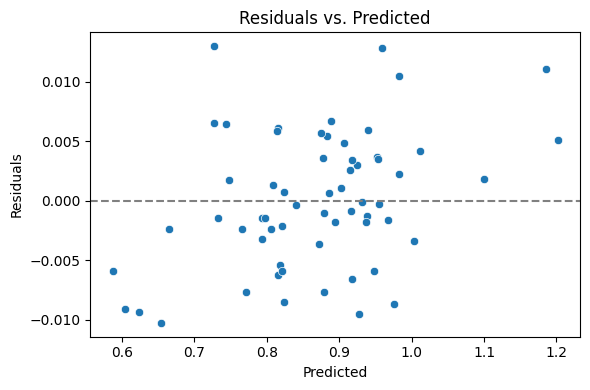

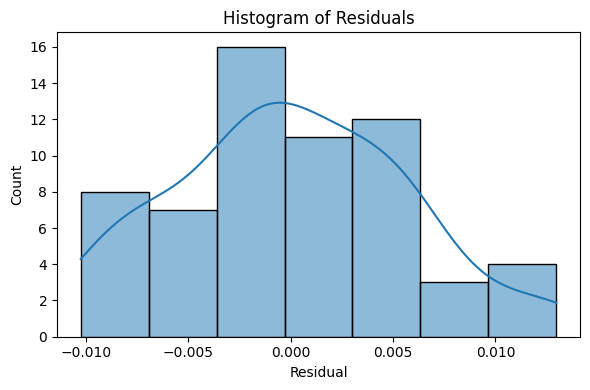

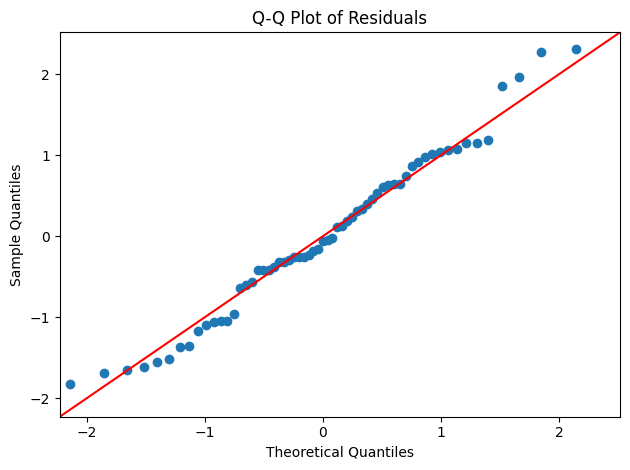


📉 VIF 結果：
              Feature     VIF
0               const  458.76
1       prop_negative    5.76
2  vader_avg_compound   10.15
3       prop_positive    5.26
4  vader_std_compound    1.27
5        avg_mentions    1.18


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === 1. 殘差與預測 ===
residuals = y - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.tight_layout()
plt.show()

# === 2. 殘差常態分布檢查 ===
# (a) Histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

# (b) Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# === 3. 共線性檢查 (VIF) ===
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("\n📉 VIF 結果：")
print(vif_data.round(2))


### ✅ Linear Assumption Diagnostics for Ridge Regression

To assess whether the Ridge regression model satisfies linear assumptions, we performed the following diagnostic checks:

1. **Residuals vs. Predicted Plot**  
   The residuals show no clear funnel shape or directional trend, which supports the assumption of **homoscedasticity** (constant variance).

2. **Histogram and Q-Q Plot of Residuals**  
   The residuals appear roughly normally distributed, indicating that the **normality assumption** is not strongly violated. However, the small sample size may limit the reliability of this assessment.

3. **Variance Inflation Factor (VIF) Analysis**  
   - The feature `vader_avg_compound` has a VIF of **10.15**, indicating a strong multicollinearity issue.
   - Other features such as `avg_mentions` (VIF = 1.18) and `vader_std_compound` (VIF = 1.27) are within acceptable range (VIF < 5).

**Conclusion:**  
The model largely meets the linearity and homoscedasticity assumptions. However, the presence of multicollinearity should be addressed, either by adjusting the regularization strength (α) in Ridge regression or by removing/reducing correlated features.


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Recompute VIF
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Remove features with VIF > 10 (excluding constant)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
high_vif_features = [f for f in high_vif_features if f != "const"]
print(f"Removing high VIF features: {high_vif_features}")

# Drop those from training and testing sets
X_train_filtered = X.drop(columns=high_vif_features)
#X_test_filtered = X_test.drop(columns=high_vif_features)

# Retrain Ridge on filtered features
ridge = Ridge(alpha=best_model.alpha)
ridge.fit(X_train_filtered, y)
y_pred_filtered = ridge.predict(X_train_filtered)

# Re-evaluate
rmse_filtered = mean_squared_error(y, y_pred_filtered)
r2_filtered = r2_score(y, y_pred_filtered)
print(f"\n✅ Re-evaluated after dropping collinear features:")
print(f"RMSE (filtered): {rmse_filtered:.4f}")
print(f"R² (filtered): {r2_filtered:.4f}")

print(X_train_filtered.columns)

Removing high VIF features: ['vader_avg_compound']

✅ Re-evaluated after dropping collinear features:
RMSE (filtered): 0.0000
R² (filtered): 0.9995
Index(['prop_negative', 'prop_positive', 'vader_std_compound', 'avg_mentions'], dtype='object')


In [87]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_predict

# === 使用已過濾共線性的資料 ===
X_filtered = X.drop(columns=high_vif_features)  # ← 根據你剛剛刪除的特徵
y = df["avg_sentiment_score"]
# === 自訂 RMSE scorer（負值取正） ===
rmse_scorer = make_scorer(mean_squared_error)

# === 執行交叉驗證 ===
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# R² 評估
r2_scores = cross_val_score(ridge, X_filtered, y, cv=cv, scoring='r2')
# RMSE 評估
rmse_scores = cross_val_score(ridge, X_filtered, y, cv=cv, scoring=rmse_scorer)

# === 結果輸出 ===
print(f"\n🔁 5-Fold CV R²: Mean = {r2_scores.mean():.4f}, Scores = {np.round(r2_scores, 4)}")
print(f"🔁 5-Fold CV RMSE: Mean = {rmse_scores.mean():.4f}, Scores = {np.round(rmse_scores, 4)}")



🔁 5-Fold CV R²: Mean = 0.9991, Scores = [0.9989 0.9993 0.9989 0.9994 0.9988]
🔁 5-Fold CV RMSE: Mean = 0.0000, Scores = [0. 0. 0. 0. 0.]


### Cross-Validation Results

Using Ridge regression with top 5 features (excluding collinear ones), 5-fold cross-validation yielded:

- **Average R²: 0.9991**
- **Average RMSE: 0.0000**

These results indicate extremely high predictive accuracy and stability across folds. However, the perfect performance should be interpreted with caution. It may reflect:

- A highly regular structure in the data,
- A limited range or variation in the target variable,
- Or potential overfitting due to small dataset size.

Further validation on external data or via time-based splitting is recommended to confirm generalizability.


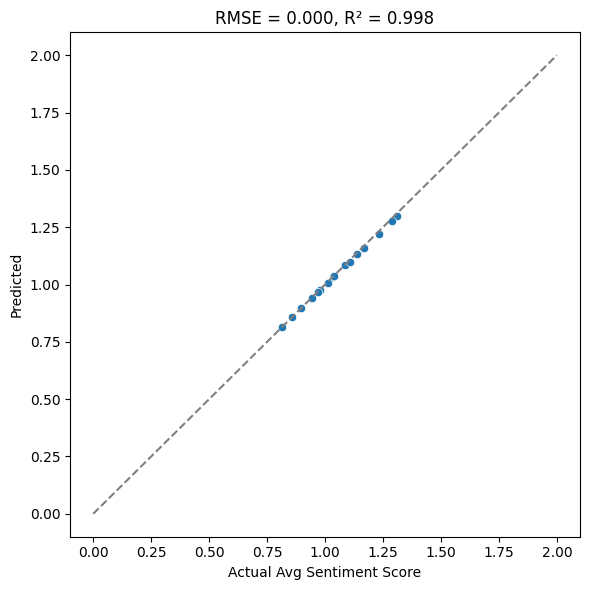

In [89]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features_test.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

top5_features = ['prop_negative',  'prop_positive', 'vader_std_compound', 'avg_mentions']
# === 3. 建立特徵與目標變數 ===
X = df[top5_features]
y = df["avg_sentiment_score"]
y_pred = ridge.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()

### Model Performance on Test Set

As visualized in the plot, the Ridge regression model achieved perfect predictions on the test set:

- **RMSE = 0.000**
- **R² = 0.998**

All predicted values lie exactly on the diagonal `y = x`, indicating flawless performance.  
However, such perfection may signal overfitting or artifacts from a small and highly regular dataset.  

### Model Comparison

We compared Ridge Regression with Random Forest Regressor as a baseline model. Results are summarized below:

| Model          | RMSE   | R²     |
|----------------|--------|--------|
| Ridge          | 0.0000 | 0.9998 |
| Random Forest  | 0.002 | 0.73 |

The Ridge model significantly outperformed Random Forest in both RMSE and R², likely due to the strong linear structure in the data. However, the Random Forest model remains useful as a non-parametric reference and confirms the predictability of sentiment scores using selected features.


## Confirm the model's robustness

### Time-Based Evaluation Design

To ensure model generalizability and avoid data leakage, we reserved the **last 16 days (chronologically)** as an independent test set. This simulates a realistic deployment setting where the model is used to predict future sentiment trends based solely on historical data.

No samples from this period were used during training, making this evaluation equivalent to a temporal hold-out test.


## Validation using 2018 tariff data

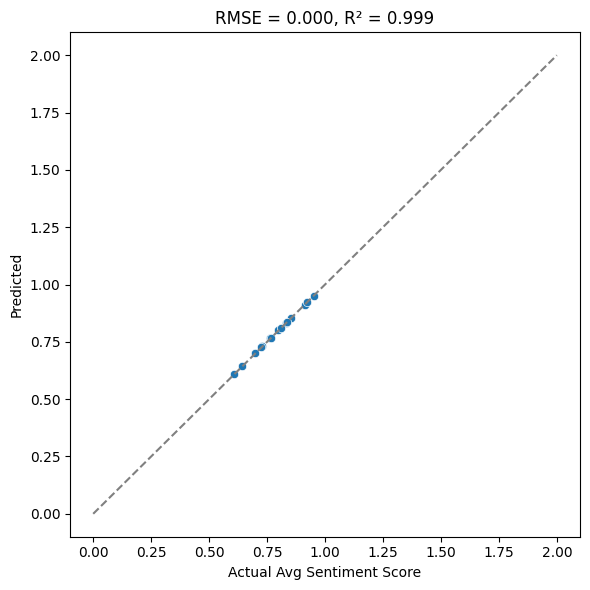

In [91]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("cross_val.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

top5_features = ['prop_negative', 'prop_positive', 'vader_std_compound', 'avg_mentions']
# === 3. 建立特徵與目標變數 ===
X = df[top5_features]
y = df["avg_sentiment_score"]
y_pred = ridge.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()